# Project code showing models and tests

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

dataset = pd.read_csv('Global YouTube Statistics.csv', encoding="iso-8859-1")

## Clean Dataset

In [2]:
from sklearn.preprocessing import LabelEncoder

df = dataset

df = df.rename(columns={ "video views": "views", "Youtuber": "youtuber" }) # keep naming scheme consistent (snake_case)
df = df[["youtuber", "subscribers", "views", "category", "uploads", "created_year"]]
df = df.dropna()
df = df.loc[df["uploads"] >= 10] # filter out low video count channels (such as auto-generated feeds like YouTube Movies)
df["created_year"] = df["created_year"].astype(int) # make created_year an integer

# add an encoded column for country codes
co_le = LabelEncoder()
df["category"] = co_le.fit_transform(df["category"])

print(df)

                       youtuber  subscribers         views  category  uploads  \
0                      T-Series    245000000  2.280000e+11         8    20082   
2                       MrBeast    166000000  2.836884e+10         3      741   
3    Cocomelon - Nursery Rhymes    162000000  1.640000e+11         2      966   
4                     SET India    159000000  1.480000e+11        14   116536   
6           ýýý Kids Diana Show    112000000  9.324704e+10        11     1111   
..                          ...          ...           ...       ...      ...   
989                   Migos ATL     12400000  6.993406e+09         8       99   
990               Natan por Aï¿     12300000  9.029610e+09        15     1200   
991    Free Fire India Official     12300000  1.674410e+09        11     1500   
993                 RobTopGames     12300000  3.741235e+08         5       39   
994                Make Joke Of     12300000  2.129774e+09         1       62   

     created_year  
0      

## Begin Analysis

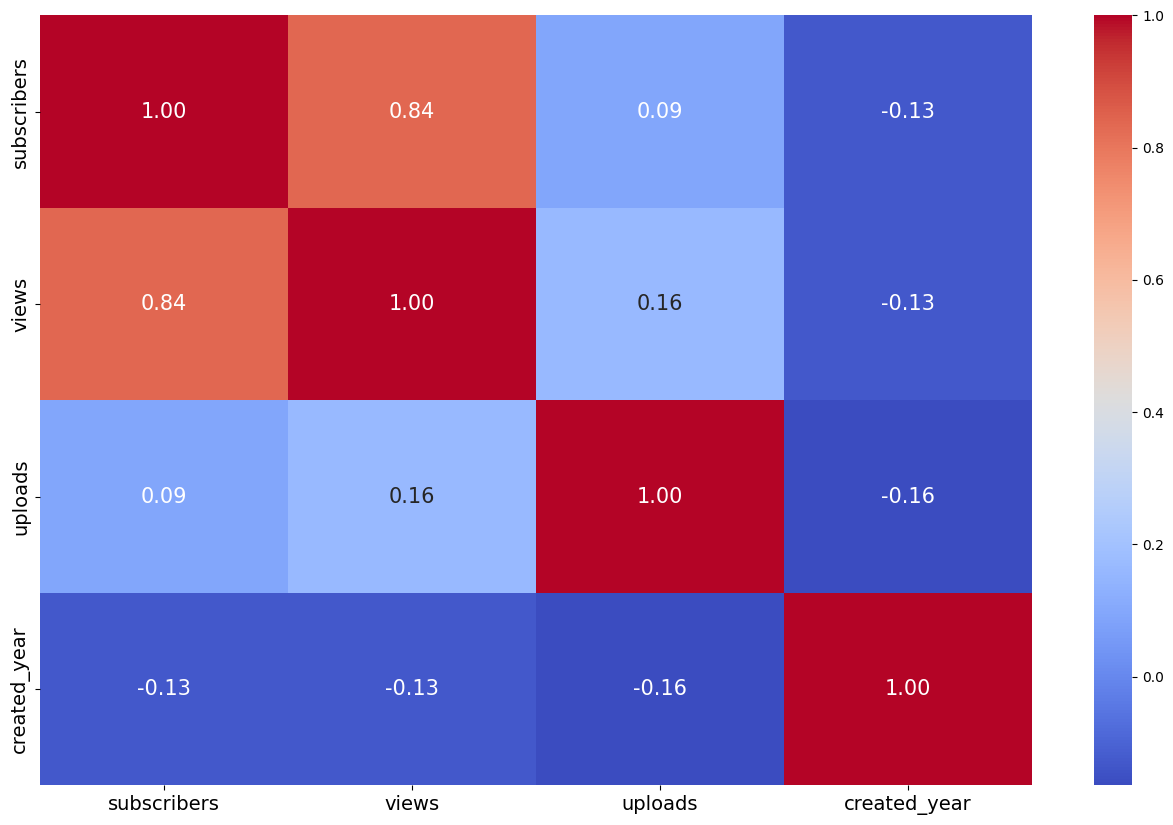

In [3]:
numeric_columns = ['subscribers', 'views', 'uploads', 'created_year']
#Set up ranks for each of the variables we kept that will help when creating the correlation heatmap
rank_analysis = df[numeric_columns].corr()
correlation_matrix = rank_analysis
plt.figure(figsize=(16,10))
#Generate the heat map using our rank analysis and setting the features based on the colors
sns.heatmap(rank_analysis, annot=True,cmap='coolwarm', fmt='.2f',annot_kws={'size':15})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [4]:
#Describe function to show our mean, median, std, and range for each of our variables.
df.describe()

,subscribers,views,category,uploads,created_year
count,8.540000e+02,8.540000e+02,854.000000,854.000000,854.000000
mean,2.270328e+07,1.143432e+10,6.086651,10656.099532,2012.442623
std,1.707097e+07,1.488025e+10,3.618305,36654.692787,4.307453
min,1.230000e+07,1.066458e+07,0.000000,10.000000,1970.000000
25%,1.450000e+07,4.353492e+09,3.000000,338.500000,2009.000000
50%,1.765000e+07,7.891461e+09,5.000000,975.000000,2013.000000
75%,2.410000e+07,1.391255e+10,8.000000,3557.500000,2015.750000
max,2.450000e+08,2.280000e+11,17.000000,301308.000000,2022.000000


# Top 10 youtube channels by num of subscribers graph

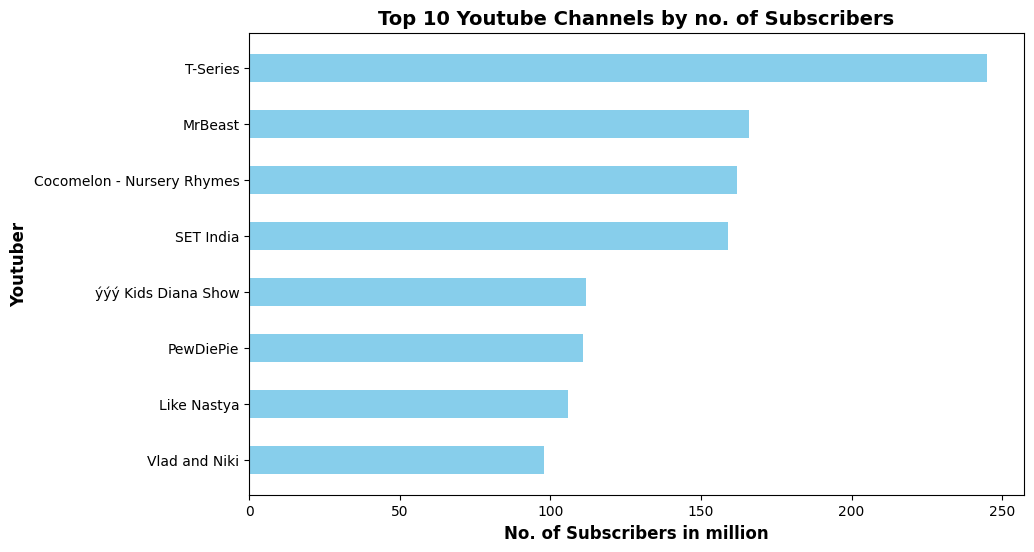

In [5]:
#Select the columns we want to compare to make the graph
colms= ['youtuber', 'subscribers']

#Then to keep the graph easier to read we will just choose the top 10 channels 
bar_colms= df.loc[0:9, colms]
bar_colms= bar_colms.sort_values('subscribers', ascending = True)

#We will set the number to millions to categorize the subscriber count
bar_colms['subscribers_mm'] = (bar_colms['subscribers'] / 1000000).astype(int)

#Adding the x and y coordinates to the graph and creating a figure size 
bar_colms
x = bar_colms['youtuber']
y = bar_colms['subscribers_mm']
fig = plt.figure(figsize =(10, 6))
 
#Then we will create the bar plot and choose the details for it with the labels
plt.barh(x, y, color= 'skyblue', height= 0.5 )
plt.xlabel("No. of Subscribers in million", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by no. of Subscribers", weight='bold', fontsize = 14)
plt.show()

# Top 10 youtube channels by num of video views graph

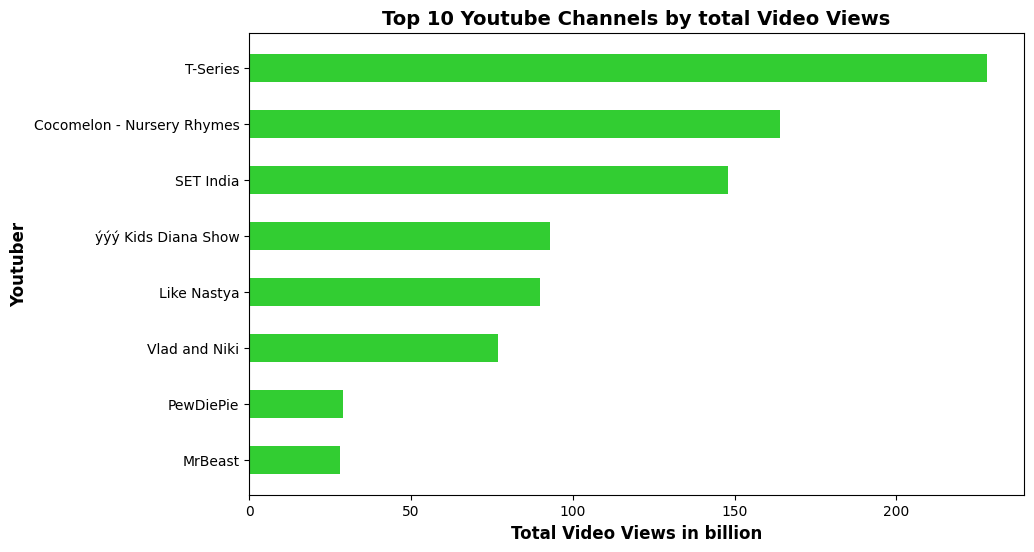

In [6]:
#Select the columns we will compare in this case its Yotuber with video views
colms= ['youtuber', 'views']

#Then to keep the graph easier to read we will just choose the top 10 channels 
bar_colms= df.loc[0:9, colms]
bar_colms= bar_colms.sort_values('views', ascending = True)

#We will set the number to billions to categorize the view count
bar_colms['views_bil'] = (bar_colms['views'] / 1000000000).astype(int)
bar_colms

#Adding the x and y coordinates to the graph and creating a figure size
x= bar_colms['youtuber']
y= bar_colms['views_bil']
fig = plt.figure(figsize =(10, 6))
 
#Then we will create the bar plot and choose the details for it with the labels
plt.barh(x, y, color= 'limegreen', height= 0.5 )
plt.xlabel("Total Video Views in billion", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by total Video Views", weight='bold', fontsize = 14)
plt.show()

# Pair Plots for comparing variables

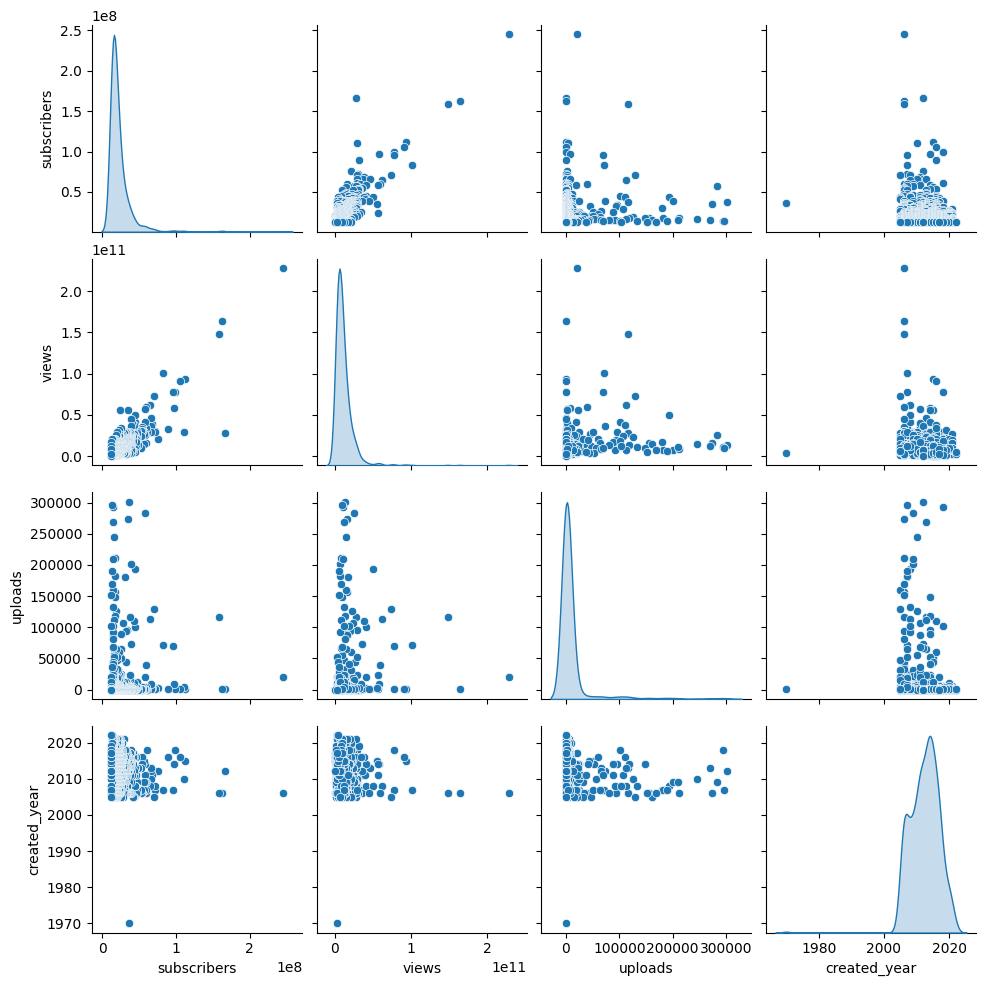

In [7]:
#To create a seaborn pairplot for each variable 
#We will use this to show relationships between the variables
sns.pairplot(df[['subscribers', 'views', 'uploads', 'created_year']], diag_kind='kde')
plt.show()

# Linear Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Set up our X (dependent) and y (independent) variables 
X = df[["views", "category", "uploads", "created_year"]]
y = df["subscribers"]

#Set up the train and test varibales that will be used to split up the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Intialize our Linear regression model and fit the data to it
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions based on our model
y_pred = model.predict(X_test)

#Evaluate the model to get the mse and r^2 value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Print out the mse and r2
print(mse, r2)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.2f}")

79348376355268.1 0.649621041791907
R-squared: 0.65


# Residuals Distribution Plot

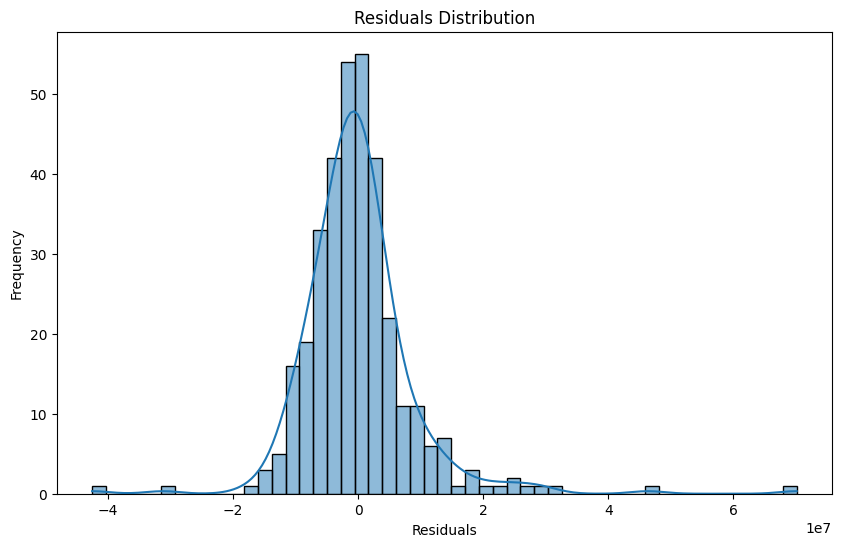

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate the residuals which is the actual - predicted values
residuals = y_test - y_pred

#Plot the residuals to get the graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual Scatter Plot

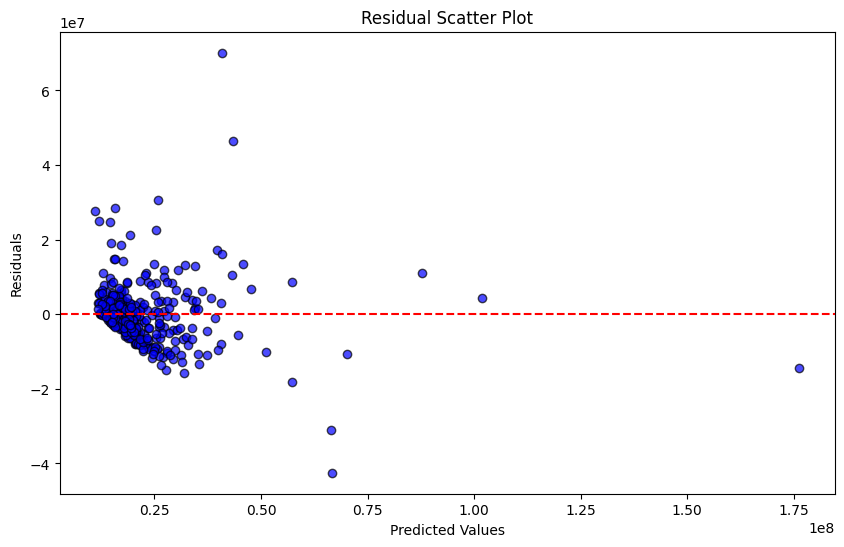

In [10]:
#Use the above data to create a scatter plot for it
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line to show the baseline
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Scatter Plot")
plt.show()

# Linearity Tests

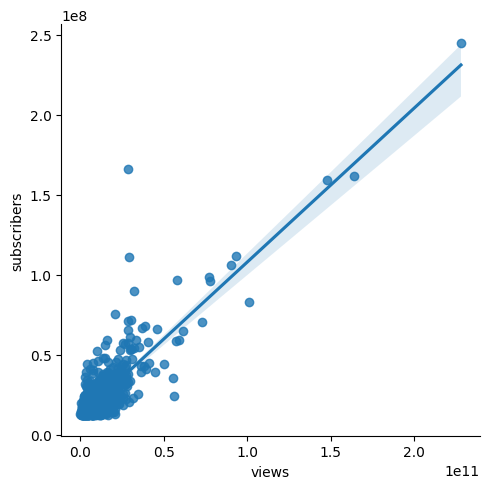

In [11]:
#Linearity Tests for video views and subscribers 
sns.lmplot(x='views', y='subscribers', data = df)

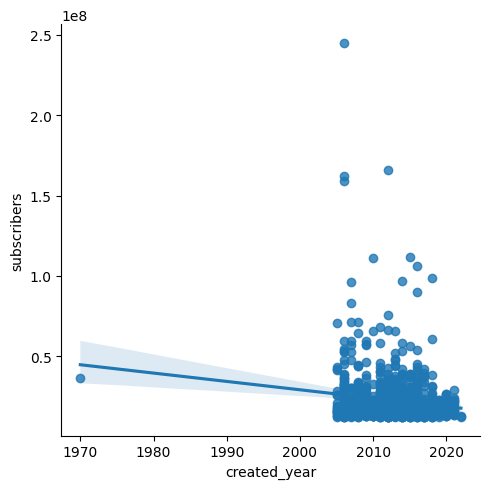

In [12]:
#Linearity Tests for highest yearly earnings and subscribers 
sns.lmplot(x='created_year', y='subscribers', data = df)

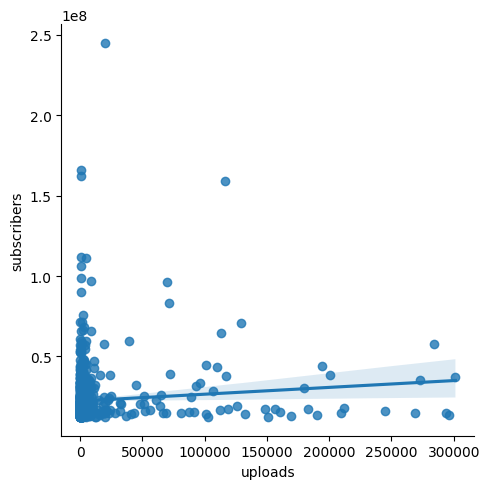

In [13]:
#Linearity Tests for uploads and subscribers 
sns.lmplot(x='uploads', y='subscribers', data = df)

#  Tests Homoscedasticity using scale loction plots

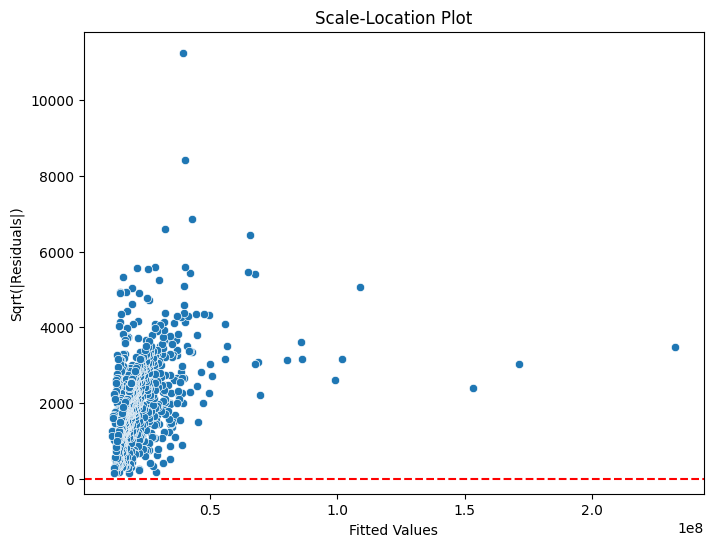

In [14]:
import statsmodels.api as sm

# Add a constant to the independent variables (for the intercept in the regression model)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Get the fitted values (y_hat) and residuals (y - y_hat)
fitted_values = model.fittedvalues
residuals = model.resid

# Standardize residuals (sqrt of absolute residuals)
standardized_residuals = np.sqrt(np.abs(residuals))

# Create the Scale-Location plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

#Add label and title
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot')
plt.show()

# Testing Normality using QQ plot

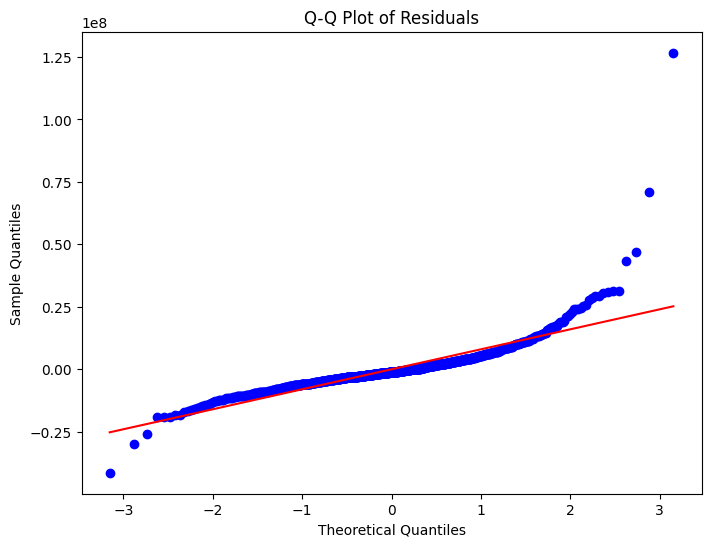

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

X = X.dropna()
y = y[X.index]  # Make sure y corresponds to the filtered X
X = X.fillna(X.mean())  # Use mean to fill NaN values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Add constant to the independent variables (for intercept) and fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Label axes and title
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Best lambda (λ) for Box-Cox transformation: -1.4012


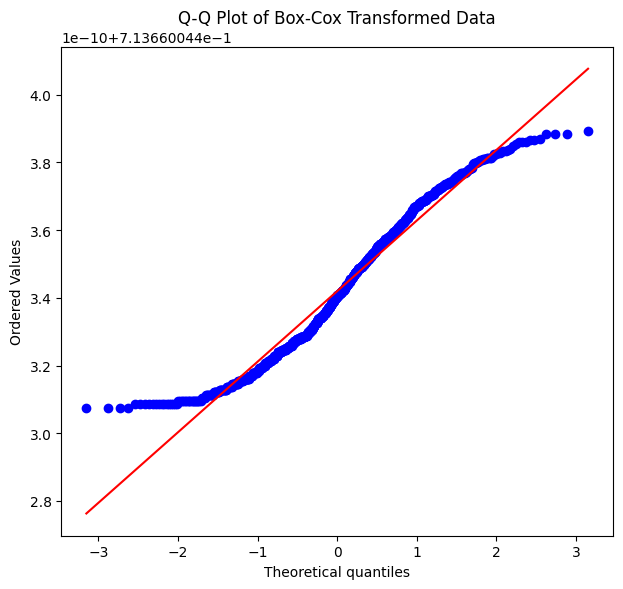

In [16]:
from scipy import stats

#We check if the values in y are positive (Box-Cox requires positive data). If they are, we apply the transformation
if (y <= 0).any():
    print("Warning: Some values in y are <= 0. You need to adjust these values before applying Box-Cox.")
else:
    #Apply Box-Cox transformation to the dependent variable y
    y_transformed, best_lambda = stats.boxcox(y)
    #Print the lambda used for transformation
    print(f"Best lambda (λ) for Box-Cox transformation: {best_lambda:.4f}")
    # Create a Q-Q plot of the original data (before transformation)
    plt.figure(figsize=(12, 6))
    # Transformed Data Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(y_transformed, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Box-Cox Transformed Data')
    plt.tight_layout()
    plt.show()

# Outlier Test

In [17]:
# Calculate the IQR (Interquartile Range) for each column in your dataset
Q1 = df[['subscribers', 'views', 'uploads', 'category', 'created_year']].quantile(0.25)
Q3 = df[['subscribers', 'views', 'uploads', 'category', 'created_year']].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers (values outside 1.5*IQR)
outliers = ((df[['subscribers', 'views', 'uploads', 'category', 'created_year']] < (Q1 - 1.5 * IQR)) | 
            (df[['subscribers', 'views', 'uploads', 'category', 'created_year']] > (Q3 + 1.5 * IQR)))

# Show rows with outliers
outlier_rows = df[outliers.any(axis=1)]
print(outlier_rows)

                                          youtuber  subscribers         views  \
0                                         T-Series    245000000  2.280000e+11   
2                                          MrBeast    166000000  2.836884e+10   
3                       Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4                                        SET India    159000000  1.480000e+11   
6                              ýýý Kids Diana Show    112000000  9.324704e+10   
..                                             ...          ...           ...   
960                                           NDTV     12500000  4.935793e+09   
963                                      Zee Tamil     12500000  1.155219e+10   
964                                 Flowers Comedy     12500000  1.169108e+10   
966                              Wave Music Bhakti     12500000  5.146004e+09   
979  DaniRep | +6 Vï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï     12400000  6.933661e+09   

     category  uploads  cre

# Cross Validation

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

#Set up training and testing varibles and splitting the data into them
#Set up the Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
#Create a 5 fold cross validation 
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

#Print the r2, mean squared, and std scores for the cross validation
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared scores: {cv_scores.mean():.2f}")
print(f"Standard deviation R-squared scores: {cv_scores.std():.2f}")

Cross-validation R-squared scores: [0.84408882 0.91358081 0.51828909 0.67005865 0.39154215]
Mean R-squared scores: 0.67
Standard deviation R-squared scores: 0.20


# kNN model

In [19]:
from sklearn.neighbors import KNeighborsRegressor

#Intialize the kNN model and fit it 
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

#Make preditions based on the model
y_pred_knn = knn.predict(X_test)

#Calculate the mse and r2 based on the kNN model then print them
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Mean squared error for kNN: {mse_knn:.2f}")
print(f"R-squared for kNN: {r2_knn:.2f}")

Mean squared error for kNN: 108685513450292.39
R-squared for kNN: 0.47


# Confusion Matrix

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

#Create 3 bins for the data to go into 
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

#Predict and the test the data and fit them into binds 
y_pred_binned = kbin.fit_transform(y_pred_knn.reshape(-1,1)).flatten()
y_test_binned = kbin.transform(y_test.values.reshape(-1,1)).flatten()

#Create a confusion matrix with the binned data
con_matrix = confusion_matrix(y_test_binned, y_pred_binned)
print(con_matrix)

[[154   1   1]
 [  7   5   0]
 [  0   2   1]]


# Decision Tree

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
#Use the decision tree regressor for the subscriber, video views, uploads, and highest yearly earnings variables 
dt = DecisionTreeRegressor(random_state=42)

#To find the best parameters we have to set up a grid to complete the cross validation 
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  
    'min_samples_leaf': [1, 2, 5, 10]  
}

#Next we need to use GridSearch to take on a 5 fold cross validation and fit the model
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

print(search.best_params_)

#We first need to train the treee regressor using the max_depth and min_samples_leaf best parameters from above
#Use search to find these best parameters
#Then again fit it to the model
best_dt = DecisionTreeRegressor(max_depth=search.best_params_['max_depth'], 
                                min_samples_leaf=search.best_params_['min_samples_leaf'],
                                random_state=42)
best_dt.fit(X_train, y_train)

print(best_dt.score(X_test, y_test))

{'max_depth': 3, 'min_samples_leaf': 1}
0.5086221662477357


In [22]:
from sklearn.tree import export_graphviz
content = export_graphviz(best_dt, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

import urllib
url_safe = urllib.parse.quote_plus(content)

from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://quickchart.io/graphviz?graph=" + url_safe)